# LDA

Description: This code uses our TFIDF table to produce a set of Topics related on the Genre Level. The objective is to see how our set of topics is distributed between our Genres to create some basic assumptions of Genre topics.

### Output

1. LDA_TERM_TABLE.csv
2. TOPICS.csv

In [1]:
import os
import csv
import pandas as pd
import re
import nltk
import numpy as np
from sklearn.decomposition import PCA
from scipy.linalg import norm
from scipy.linalg import eigh as eig
import plotly_express as px
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from gensim.models import word2vec
from sklearn.manifold import TSNE
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
TFIDF_file = "TFIDF.csv"
TOKEN_file = "TOKEN.csv"
VOCAB_file = "VOCAB.csv"
TFIDF = pd.read_csv(TFIDF_file).set_index(["Genre","Artist","SName","Language"])
TOKEN = pd.read_csv(TOKEN_file)
VOCAB = pd.read_csv(VOCAB_file)


In [3]:
OHCO = ['Genre', 'Artist',  'SName','Language', 'sent_num', 'token_num']
LANG = OHCO[:4]
SONG = OHCO[:3]
ARTIST = OHCO[:2]
GENRE = OHCO[:1]

In [4]:
n_terms = 10000
n_topics = 30
max_iter = 5
TOKEN['term_str'] = TOKEN['term_str'].astype(str)
ARTISTS = TOKEN[TOKEN.pos.str.match(r'^NNS?$')]\
    .groupby(ARTIST).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'Lyrics'})

In [5]:
ARTISTS.sample(10)

Lyrics
Genre        Artist                                                                         
Hip Hop      Calle 13                      heart lemon heart lemon look girl girl fight h...
Rock         Creedence Clearwater Revival  highway thirty people lives highway thirty peo...
             White Stripes                 baby baby baby baby baby baby wah wah wah wah ...
             Ozzy Osbourne                 purpose phenomenon flux reflux world destruct ...
Hip Hop      Pharrell Williams             heaven things birds ability opportunities i ti...
Sertanejo    Edson e Hudson                overcoming family brother front direction peop...
Rock         Within Temptation             leaves skies night closing day sings song fare...
Hip Hop      Snoop Dogg                    boy game way way girl town pair clowns clowns ...
Funk Carioca Mc Leozinho do Recife         letter jail freedom man jaja tranquility activ...
Hip Hop      Usher                         party man theres women time life dj dj dj turn...

In [6]:
tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(ARTISTS.Lyrics)
TERMS = tfv.get_feature_names()

In [7]:
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

In [8]:
THETA = pd.DataFrame(lda.fit_transform(tf), index=ARTISTS.index)
THETA.columns.name = 'topic_id'

In [9]:
THETA.sample(20).style.background_gradient()

In [10]:
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [11]:
PHI.T.head().style.background_gradient()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
term_str,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4pound,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
50cents,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333
64,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
88,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
88886588,0.033333,0.033333,0.033333,0.052315,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.014352,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333


In [12]:
TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [13]:
TERM_TOPIC_TABLE = PHI.T
VOCAB_TMP = VOCAB.reset_index()
LDA_TERM_TABLE = pd.merge(TERM_TOPIC_TABLE, VOCAB_TMP,how="inner", on=["term_str"])

LDA_TERM_TABLE = LDA_TERM_TABLE[[    'term_str',              0,              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15,             16,             17,             18,
                   19,             20,             21,             22,
                   23,             24,             25,             26,
                   27,             28,             29,      'term_id']]

LDA_TERM_TABLE.set_index('term_id')

,term_str,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
term_id,,,,,,,,,,,,,,,,,,,,,
180,4pound,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
191,50cents,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333
210,64,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
249,88,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
250,88886588,0.033333,0.033333,0.033333,0.052315,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,zés,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
24417,éééé,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
24422,êêêê,0.033333,0.033333,0.033333,2.014206,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.052461,0.033333


In [14]:
LDA_TERM_TABLE

,term_str,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,term_id
0,4pound,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,180
1,50cents,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,191
2,64,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,210
3,88,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,1.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,249
4,88886588,0.033333,0.033333,0.033333,0.052315,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,zés,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,24404
9995,éééé,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,24417
9996,êêêê,0.033333,0.033333,0.033333,2.014206,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.052461,0.033333,24422
9997,êêêêê,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,...,0.033333,0.033333,1.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,24423


In [15]:
LDA_TERM_TABLE.to_csv('LDA_TERM_TABLE.csv')

In [16]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x), 1)

In [17]:
TOPICS['doc_weight_sum'] = THETA.sum()

### Top Topics based on document weight Sum

<AxesSubplot:ylabel='label'>

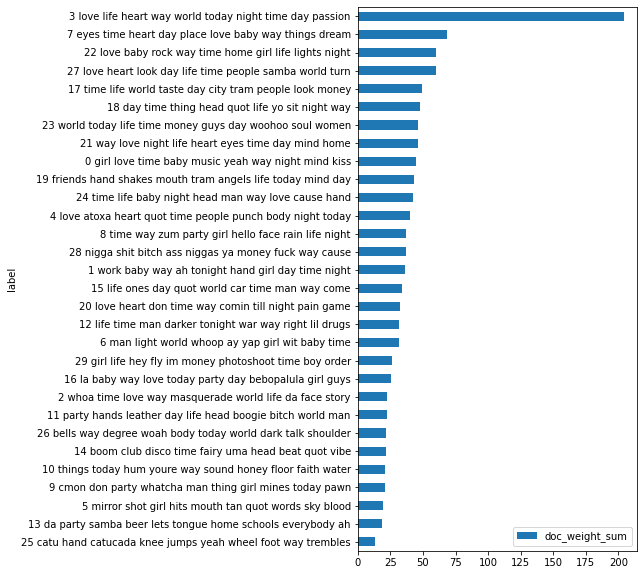

In [18]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5,10)) 

In [19]:
TOPICS.to_csv('TOPICS.csv')

In [20]:
topic_cols = [t for t in range(n_topics)]
GENRE = THETA.groupby('Genre')[topic_cols].mean().T                                            
GENRE.index.name = 'topic_id'

In [21]:
GENRE.T

topic_id,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Genre,,,,,,,,,,,,,,,,,,,,,
Funk Carioca,0.036407,0.015212,0.018847,0.105711,0.052192,0.011234,0.000729,0.014533,0.029902,0.024273,...,0.017946,0.034122,0.031338,0.068252,0.028725,0.018347,0.041060,0.017625,0.041688,0.028902
Hip Hop,0.047625,0.052776,0.005475,0.035221,0.028224,0.011466,0.037496,0.018364,0.043027,0.012602,...,0.019851,0.022081,0.082371,0.058647,0.044315,0.005826,0.009909,0.056747,0.094526,0.017990
Pop,0.045570,0.038160,0.036311,0.138839,0.026732,0.022197,0.021079,0.099693,0.048417,0.007760,...,0.027506,0.031145,0.069033,0.031694,0.039756,0.010969,0.031774,0.031136,0.017286,0.012913
Rock,0.033284,0.024551,0.016459,0.087320,0.018834,0.025862,0.047867,0.077395,0.025728,0.020194,...,0.028482,0.070893,0.048807,0.031308,0.051828,0.017601,0.012244,0.035103,0.018744,0.032049
Samba,0.014658,0.011642,0.002804,0.362995,0.023009,0.011111,0.007699,0.016411,0.004420,0.010891,...,0.019890,0.012472,0.046333,0.020400,0.014303,0.008214,0.002438,0.124391,0.007766,0.015236
Sertanejo,0.032015,0.026945,0.017140,0.373524,0.052410,0.001707,0.018288,0.057990,0.018637,0.024577,...,0.039509,0.028770,0.013496,0.022465,0.010111,0.001226,0.005682,0.069457,0.007234,0.017520


In [22]:
GENRE['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)

### List of Top Topics Per Genre

In [23]:
GENRE.sort_values('Funk Carioca', ascending=False).style.background_gradient()

Genre,Funk Carioca,Hip Hop,Pop,Rock,Samba,Sertanejo,topterms
topic_id,,,,,,,
3,0.105711,0.035221,0.138839,0.087320,0.362995,0.373524,love life heart way world today night time day passion
19,0.087461,0.033053,0.028256,0.031358,0.022551,0.015427,friends hand shakes mouth tram angels life today mind day
23,0.068252,0.058647,0.031694,0.031308,0.020400,0.022465,world today life time money guys day woohoo soul women
17,0.064108,0.040780,0.028881,0.048636,0.042515,0.020278,time life world taste day city tram people look money
4,0.052192,0.028224,0.026732,0.018834,0.023009,0.052410,love atoxa heart quot time people punch body night today
14,0.041720,0.006436,0.012129,0.022439,0.013314,0.011366,boom club disco time fairy uma head beat quot vibe
28,0.041688,0.094526,0.017286,0.018744,0.007766,0.007234,nigga shit bitch ass niggas ya money fuck way cause
26,0.041060,0.009909,0.031774,0.012244,0.002438,0.005682,bells way degree woah body today world dark talk shoulder
0,0.036407,0.047625,0.045570,0.033284,0.014658,0.032015,girl love time baby music yeah way night mind kiss


In [24]:
GENRE.sort_values('Hip Hop', ascending=False).style.background_gradient()

Genre,Funk Carioca,Hip Hop,Pop,Rock,Samba,Sertanejo,topterms
topic_id,,,,,,,
28,0.041688,0.094526,0.017286,0.018744,0.007766,0.007234,nigga shit bitch ass niggas ya money fuck way cause
22,0.031338,0.082371,0.069033,0.048807,0.046333,0.013496,love baby rock way time home girl life lights night
23,0.068252,0.058647,0.031694,0.031308,0.020400,0.022465,world today life time money guys day woohoo soul women
27,0.017625,0.056747,0.031136,0.035103,0.124391,0.069457,love heart look day life time people samba world turn
1,0.015212,0.052776,0.038160,0.024551,0.011642,0.026945,work baby way ah tonight hand girl day time night
15,0.028697,0.050458,0.020404,0.028509,0.028900,0.013653,life ones day quot world car time man way come
18,0.030123,0.050022,0.035952,0.041770,0.039324,0.035723,day time thing head quot life yo sit night way
0,0.036407,0.047625,0.045570,0.033284,0.014658,0.032015,girl love time baby music yeah way night mind kiss
24,0.028725,0.044315,0.039756,0.051828,0.014303,0.010111,time life baby night head man way love cause hand


In [25]:
GENRE.sort_values('Rock', ascending=False).style.background_gradient()

Genre,Funk Carioca,Hip Hop,Pop,Rock,Samba,Sertanejo,topterms
topic_id,,,,,,,
3,0.105711,0.035221,0.138839,0.087320,0.362995,0.373524,love life heart way world today night time day passion
7,0.014533,0.018364,0.099693,0.077395,0.016411,0.057990,eyes time heart day place love baby way things dream
21,0.034122,0.022081,0.031145,0.070893,0.012472,0.028770,way love night life heart eyes time day mind home
24,0.028725,0.044315,0.039756,0.051828,0.014303,0.010111,time life baby night head man way love cause hand
22,0.031338,0.082371,0.069033,0.048807,0.046333,0.013496,love baby rock way time home girl life lights night
17,0.064108,0.040780,0.028881,0.048636,0.042515,0.020278,time life world taste day city tram people look money
6,0.000729,0.037496,0.021079,0.047867,0.007699,0.018288,man light world whoop ay yap girl wit baby time
18,0.030123,0.050022,0.035952,0.041770,0.039324,0.035723,day time thing head quot life yo sit night way
12,0.013952,0.040367,0.026206,0.038047,0.016363,0.009632,life time man darker tonight war way right lil drugs


In [26]:
GENRE.sort_values('Pop', ascending=False).style.background_gradient()

Genre,Funk Carioca,Hip Hop,Pop,Rock,Samba,Sertanejo,topterms
topic_id,,,,,,,
3,0.105711,0.035221,0.138839,0.087320,0.362995,0.373524,love life heart way world today night time day passion
7,0.014533,0.018364,0.099693,0.077395,0.016411,0.057990,eyes time heart day place love baby way things dream
22,0.031338,0.082371,0.069033,0.048807,0.046333,0.013496,love baby rock way time home girl life lights night
8,0.029902,0.043027,0.048417,0.025728,0.004420,0.018637,time way zum party girl hello face rain life night
0,0.036407,0.047625,0.045570,0.033284,0.014658,0.032015,girl love time baby music yeah way night mind kiss
24,0.028725,0.044315,0.039756,0.051828,0.014303,0.010111,time life baby night head man way love cause hand
1,0.015212,0.052776,0.038160,0.024551,0.011642,0.026945,work baby way ah tonight hand girl day time night
2,0.018847,0.005475,0.036311,0.016459,0.002804,0.017140,whoa time love way masquerade world life da face story
18,0.030123,0.050022,0.035952,0.041770,0.039324,0.035723,day time thing head quot life yo sit night way


In [27]:
GENRE.sort_values('Samba', ascending=False).style.background_gradient()

Genre,Funk Carioca,Hip Hop,Pop,Rock,Samba,Sertanejo,topterms
topic_id,,,,,,,
3,0.105711,0.035221,0.138839,0.087320,0.362995,0.373524,love life heart way world today night time day passion
27,0.017625,0.056747,0.031136,0.035103,0.124391,0.069457,love heart look day life time people samba world turn
22,0.031338,0.082371,0.069033,0.048807,0.046333,0.013496,love baby rock way time home girl life lights night
17,0.064108,0.040780,0.028881,0.048636,0.042515,0.020278,time life world taste day city tram people look money
13,0.024700,0.005512,0.005314,0.018332,0.040481,0.010916,da party samba beer lets tongue home schools everybody ah
18,0.030123,0.050022,0.035952,0.041770,0.039324,0.035723,day time thing head quot life yo sit night way
16,0.030562,0.016773,0.014372,0.014639,0.032868,0.026824,la baby way love today party day bebopalula girl guys
15,0.028697,0.050458,0.020404,0.028509,0.028900,0.013653,life ones day quot world car time man way come
4,0.052192,0.028224,0.026732,0.018834,0.023009,0.052410,love atoxa heart quot time people punch body night today


In [28]:
GENRE.sort_values('Sertanejo', ascending=False).style.background_gradient()

Genre,Funk Carioca,Hip Hop,Pop,Rock,Samba,Sertanejo,topterms
topic_id,,,,,,,
3,0.105711,0.035221,0.138839,0.087320,0.362995,0.373524,love life heart way world today night time day passion
27,0.017625,0.056747,0.031136,0.035103,0.124391,0.069457,love heart look day life time people samba world turn
7,0.014533,0.018364,0.099693,0.077395,0.016411,0.057990,eyes time heart day place love baby way things dream
4,0.052192,0.028224,0.026732,0.018834,0.023009,0.052410,love atoxa heart quot time people punch body night today
20,0.017946,0.019851,0.027506,0.028482,0.019890,0.039509,love heart don time way comin till night pain game
18,0.030123,0.050022,0.035952,0.041770,0.039324,0.035723,day time thing head quot life yo sit night way
0,0.036407,0.047625,0.045570,0.033284,0.014658,0.032015,girl love time baby music yeah way night mind kiss
21,0.034122,0.022081,0.031145,0.070893,0.012472,0.028770,way love night life heart eyes time day mind home
1,0.015212,0.052776,0.038160,0.024551,0.011642,0.026945,work baby way ah tonight hand girl day time night


In [29]:
TERM_TOPICS = THETA[topic_cols].mean().T       

In [30]:
THETA

topic_id                                       0         1         2   \
Genre        Artist                                                     
Funk Carioca 3zi                         0.000654  0.000654  0.000654   
             Allycia                     0.000595  0.000595  0.000595   
             Ander-som Brasil            0.000327  0.000327  0.000327   
             Andrezinho Shock            0.000855  0.000855  0.000855   
             Anitta                      0.000053  0.000053  0.000053   
...                                           ...       ...       ...   
Sertanejo    Zé Mariano Júnior           0.000422  0.000422  0.000422   
             Zé Mulato & Cassiano        0.000407  0.000407  0.000407   
             Zé Neto e Cristiano         0.000476  0.000476  0.000476   
             Zé Tapera e Teodoro         0.001111  0.001111  0.001111   
             Zé do Rancho & Zé do Pinho  0.000952  0.000952  0.000952   

topic_id                                       3         4         5   \
Genre        Artist                                                     
Funk Carioca 3zi                         0.576325  0.000654  0.000654   
             Allycia                     0.000595  0.000595  0.000595   
             Ander-som Brasil            0.669342  0.000327  0.000327   
             Andrezinho Shock            0.000855  0.000855  0.000855   
             Anitta                      0.178893  0.000053  0.000053   
...                                           ...       ...       ...   
Sertanejo    Zé Mariano Júnior           0.000422  0.000422  0.000422   
             Zé Mulato & Cassiano        0.289537  0.000407  0.000407   
             Zé Neto e Cristiano         0.269897  0.000476  0.000476   
             Zé Tapera e Teodoro         0.338039  0.001111  0.001111   
             Zé do Rancho & Zé do Pinho  0.972381  0.000952  0.000952   

topic_id                                       6         7         8   \
Genre        Artist                                                     
Funk Carioca 3zi                         0.000654  0.000654  0.000654   
             Allycia                     0.000595  0.000595  0.000595   
             Ander-som Brasil            0.000327  0.000327  0.000327   
             Andrezinho Shock            0.000855  0.000855  0.000855   
             Anitta                      0.000053  0.000053  0.000053   
...                                           ...       ...       ...   
Sertanejo    Zé Mariano Júnior           0.000422  0.000422  0.000422   
             Zé Mulato & Cassiano        0.000407  0.000407  0.000407   
             Zé Neto e Cristiano         0.000476  0.000476  0.000476   
             Zé Tapera e Teodoro         0.001111  0.337666  0.001111   
             Zé do Rancho & Zé do Pinho  0.000952  0.000952  0.000952   

topic_id                                       9   ...        20        21  \
Genre        Artist                                ...                       
Funk Carioca 3zi                         0.000654  ...  0.000654  0.000654   
             Allycia                     0.000595  ...  0.000595  0.000595   
             Ander-som Brasil            0.000327  ...  0.000327  0.000327   
             Andrezinho Shock            0.000855  ...  0.000855  0.000855   
             Anitta                      0.000053  ...  0.000053  0.000053   
...                                           ...  ...       ...       ...   
Sertanejo    Zé Mariano Júnior           0.683160  ...  0.000422  0.000422   
             Zé Mulato & Cassiano        0.000407  ...  0.000407  0.000407   
             Zé Neto e Cristiano         0.000476  ...  0.000476  0.000476   
             Zé Tapera e Teodoro         0.001111  ...  0.001111  0.001111   
             Zé do Rancho & Zé do Pinho  0.000952  ...  0.000952  0.000952   

topic_id                                       22        23        24  \
Genre        Artist                                           

# Hiearchal Clustering

We can see the expected topics clustering together. The Hip Hop topics come together nicely, as well as the "Love" based topics

In [31]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, 10))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

In [32]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')

In [33]:
labels  = ["{}: {}".format(a,b) for a, b in zip(GENRE.index,  GENRE.topterms.tolist())]

<Figure size 432x288 with 0 Axes>

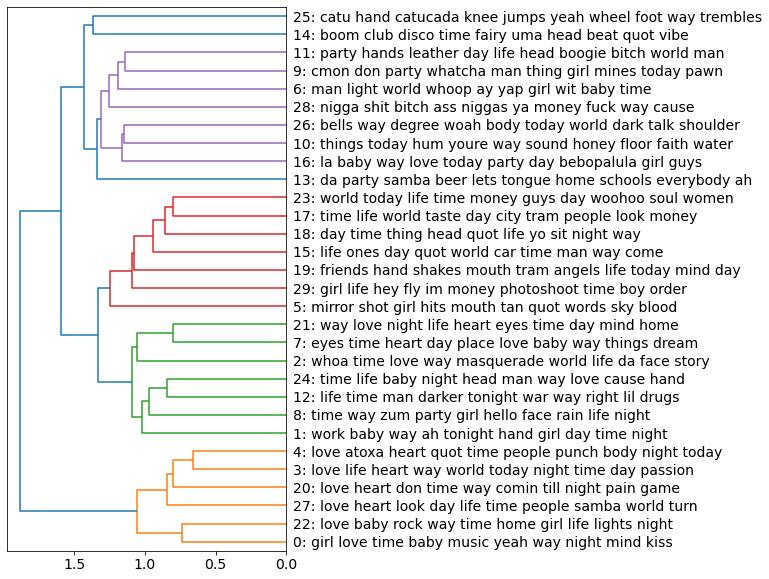

In [34]:
plot_tree(TREE, labels)